<a href="https://www.kaggle.com/code/nguyenthien3001/ph-n-t-ch-v-clan-trong-clash-of-clans?scriptVersionId=194924008" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import các thư viện cần thiết

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 200)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clash-of-clans-clans-dataset-2023-3-5m-clans/coc_clans_dataset.csv


## Đọc file và các thông số cần thiết

In [2]:
df = pd.read_csv(r'/kaggle/input/clash-of-clans-clans-dataset-2023-3-5m-clans/coc_clans_dataset.csv')

In [3]:
df.drop_duplicates()

,clan_tag,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,clan_versus_points,required_trophies,war_frequency,war_win_streak,war_wins,war_ties,war_losses,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
0,#UQVQRJQ0,KOJIS' CLAN,closed,STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...,International,True,https://api-assets.clashofclans.com/badges/200...,6,6887,5213,5213,800,moreThanOncePerWeek,1,93,0,31,Unranked,11,1000,1000,1,1,0,Unranked,83,1254
1,#2QC9Y0CQU,uye,open,NaN,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,876,1019,1019,0,unknown,0,0,0,0,Unranked,1,0,0,1,0,0,Unranked,90,1752
2,#202CJRP2U,Uprising rivals,open,💥official uprising rivals clan💥we bring 10% lu...,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,732,670,670,0,always,1,1,0,0,Unranked,2,0,0,1,0,0,Unranked,30,733
3,#2Y89RRGLY,2inchersonly,open,"Whom is not packing the meat, Shall be packing...",International,True,https://api-assets.clashofclans.com/badges/200...,2,1156,457,457,600,always,0,7,0,11,Bronze League I,2,0,0,1,1,0,Unranked,61,1156
4,#99PU9QPY,aymil,open,regla1=no empezar la guerra sin mi permiso reg...,International,True,https://api-assets.clashofclans.com/badges/200...,2,674,399,399,0,always,0,3,0,11,Unranked,2,0,0,1,0,0,Unranked,23,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559738,#JP9Q8QQU,Eos2017,open,Clan actif et sympa ! Pas de gros mot sinon la...,France,False,https://api-assets.clashofclans.com/badges/200...,1,332,141,141,0,moreThanOncePerWeek,0,0,0,0,Unranked,2,0,0,1,0,0,Unranked,8,332
3559739,#VUV2URJ,.Loki.,open,In Loki We Trust,NaN,False,https://api-assets.clashofclans.com/badges/200...,1,317,71,71,0,unknown,0,0,0,0,Unranked,1,0,0,1,0,0,Unranked,12,635
3559740,#22C2PCPUG,13699875508,open,NaN,NaN,False,https://api-assets.clashofclans.com/badges/200...,1,379,338,338,0,unknown,0,0,0,1,Unranked,2,0,0,1,0,0,Unranked,17,379
3559741,#2YU8QJJU8,Gila Lu Ndro,open,"war Saja, Jarang Farming, , harap maklum klo d...",Indonesia,False,https://api-assets.clashofclans.com/badges/200...,6,992,1580,1580,3400,always,0,42,0,17,Crystal League II,1,3400,3400,10,2,0,Unranked,164,1984


In [4]:
df.head(10)

,clan_tag,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,clan_versus_points,required_trophies,war_frequency,war_win_streak,war_wins,war_ties,war_losses,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
0,#UQVQRJQ0,KOJIS' CLAN,closed,STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...,International,True,https://api-assets.clashofclans.com/badges/200...,6,6887,5213,5213,800,moreThanOncePerWeek,1,93,0,31,Unranked,11,1000,1000,1,1,0,Unranked,83,1254
1,#2QC9Y0CQU,uye,open,NaN,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,876,1019,1019,0,unknown,0,0,0,0,Unranked,1,0,0,1,0,0,Unranked,90,1752
2,#202CJRP2U,Uprising rivals,open,💥official uprising rivals clan💥we bring 10% lu...,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,732,670,670,0,always,1,1,0,0,Unranked,2,0,0,1,0,0,Unranked,30,733
3,#2Y89RRGLY,2inchersonly,open,"Whom is not packing the meat, Shall be packing...",International,True,https://api-assets.clashofclans.com/badges/200...,2,1156,457,457,600,always,0,7,0,11,Bronze League I,2,0,0,1,1,0,Unranked,61,1156
4,#99PU9QPY,aymil,open,regla1=no empezar la guerra sin mi permiso reg...,International,True,https://api-assets.clashofclans.com/badges/200...,2,674,399,399,0,always,0,3,0,11,Unranked,2,0,0,1,0,0,Unranked,23,674
5,#282RGR09C,1worey200,open,NaN,Pakistan,True,https://api-assets.clashofclans.com/badges/200...,2,611,692,692,0,unknown,0,7,1,21,Bronze League II,2,0,0,1,0,0,Unranked,22,611
6,#2G88QRQV2,leuke vrouwen,open,hoi,NaN,True,https://api-assets.clashofclans.com/badges/200...,1,383,309,309,0,unknown,0,0,0,0,Unranked,1,0,0,1,0,0,Unranked,28,766
7,#2Y9Q9GJP9,gryffindor,open,gelirseniz büyüyebiliriz.,Türkiye,True,https://api-assets.clashofclans.com/badges/200...,1,479,138,138,0,unknown,0,0,0,0,Unranked,2,0,0,1,0,0,Unranked,15,479
8,#2QY9RV8GR,DBlocks,inviteOnly,we them boys,Bahamas,True,https://api-assets.clashofclans.com/badges/200...,1,1028,1270,1270,0,unknown,0,0,0,0,Unranked,1,0,0,1,0,0,Unranked,141,2056
9,#8PC0L2CG,GSA FAMILLY,open,NaN,International,True,https://api-assets.clashofclans.com/badges/200...,1,289,0,0,0,never,0,0,0,0,Unranked,1,0,0,1,0,0,Unranked,14,578


In [5]:
df.columns

Index(['clan_tag', 'clan_name', 'clan_type', 'clan_description',
       'clan_location', 'isFamilyFriendly', 'clan_badge_url', 'clan_level',
       'clan_points', 'clan_builder_base_points', 'clan_versus_points',
       'required_trophies', 'war_frequency', 'war_win_streak', 'war_wins',
       'war_ties', 'war_losses', 'clan_war_league', 'num_members',
       'required_builder_base_trophies', 'required_versus_trophies',
       'required_townhall_level', 'clan_capital_hall_level',
       'clan_capital_points', 'capital_league', 'mean_member_level',
       'mean_member_trophies'],
      dtype='object')

In [6]:
df = df.drop(columns = ['clan_description','clan_badge_url','clan_name','war_frequency'
                       ,'war_win_streak','mean_member_level','mean_member_trophies',
                       'required_builder_base_trophies'])

In [7]:
df.describe()

,clan_level,clan_points,clan_builder_base_points,clan_versus_points,required_trophies,war_wins,war_ties,war_losses,num_members,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points
count,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06
mean,2.349883e+00,2.576062e+03,2.562565e+03,2.562565e+03,3.760651e+02,1.750428e+01,2.143728e-01,9.981437e+00,4.758147e+00,2.305894e+02,2.195218e+00,5.651079e-01,6.836864e+01
std,3.298436e+00,5.863921e+03,5.866313e+03,5.866313e+03,8.334661e+02,6.050237e+01,1.355269e+00,3.696328e+01,8.287075e+00,7.362564e+02,2.733998e+00,1.607310e+00,3.652351e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.520000e+02,1.000000e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,6.930000e+02,6.470000e+02,6.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,1.801000e+03,1.867000e+03,1.867000e+03,4.000000e+02,6.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,3.600000e+01,5.472100e+04,5.168600e+04,5.168600e+04,6.553500e+04,1.565000e+03,3.190000e+02,1.220000e+03,5.000000e+01,5.500000e+03,1.500000e+01,1.000000e+01,5.866000e+03


## Các loại clan ở Việt Nam

In [8]:
vietnam_clan_type = df[df['clan_location'] == 'Vietnam']['clan_type']
vietnam_clan_type.replace('open', 'Gia nhập tự do', inplace=True)
vietnam_clan_type.replace('inviteOnly', 'Chỉ dành cho\nngười được mời', inplace=True)
vietnam_clan_type.replace('closed', 'Hội kín', inplace=True)
vietnam_clan_type.value_counts()

clan_type
Gia nhập tự do                  17027
Chỉ dành cho\nngười được mời     5950
Hội kín                          1137
Name: count, dtype: int64

Text(0.5, 1.0, 'So sánh số lượng các loại clan ở Việt Nam')

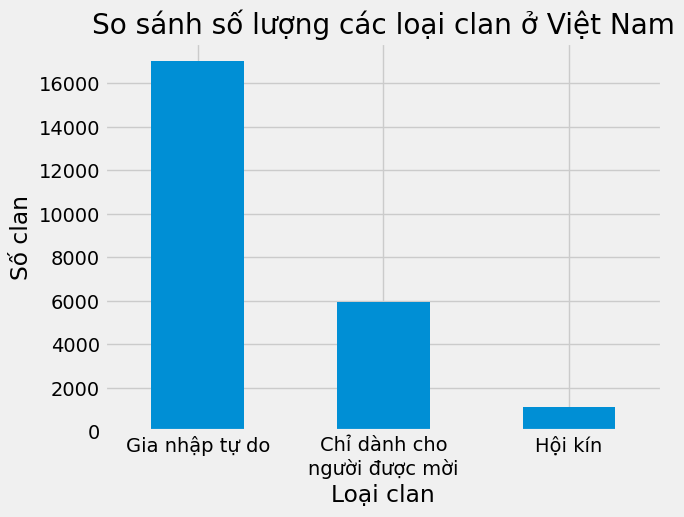

In [9]:
vietnam_clan_type.value_counts().plot(kind='bar',xlabel = 'Loại clan', ylabel = 'Số clan')
plt.xticks(rotation = 0)
plt.title('So sánh số lượng các loại clan ở Việt Nam')

## Top những quốc gia có nhiều người chơi COC nhất

<Figure size 3000x2000 with 0 Axes>

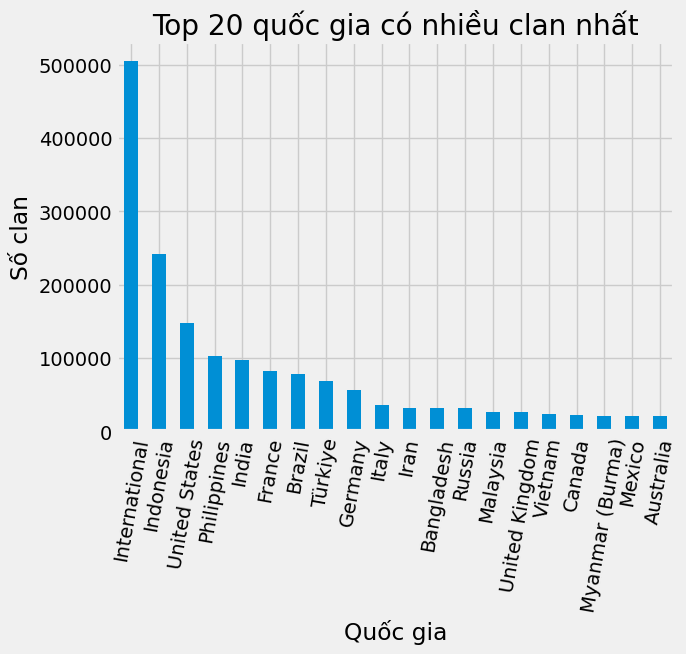

<Figure size 3000x2000 with 0 Axes>

In [10]:
df['clan_location'].value_counts()[:20].plot(kind = 'bar',ylabel = 'Số clan',xlabel = 'Quốc gia')
plt.title('Top 20 quốc gia có nhiều clan nhất')
plt.xticks(rotation=80)
plt.figure(figsize=(30, 20))

## Chế độ trẻ em

In [11]:
vietnam_isFamilyFriendly = df[df['clan_location'] == 'Vietnam']['isFamilyFriendly']
vietnam_isFamilyFriendly.replace([True,False],['Có bật','Không bật'],inplace = True)
vietnam_isFamilyFriendly.value_counts()

isFamilyFriendly
Không bật    16519
Có bật        7595
Name: count, dtype: int64

Text(0.5, 1.0, 'Bật phù hợp với trẻ em ở Việt Nam')

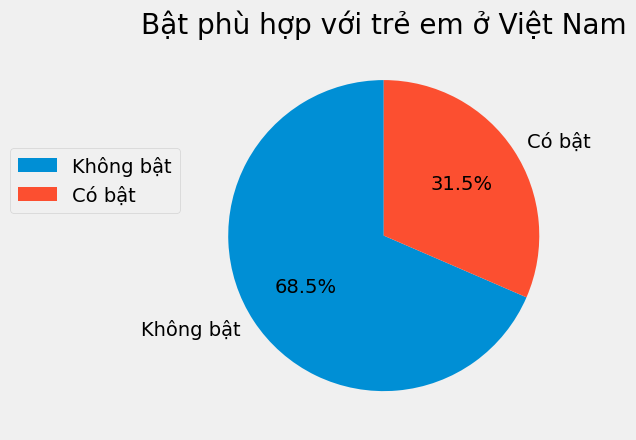

In [12]:
vietnam_isFamilyFriendly.value_counts().plot(kind='pie',autopct='%1.1f%%',ylabel = '',startangle=90)
plt.legend(loc='upper right', bbox_to_anchor=(0,0.75))
plt.title('Bật phù hợp với trẻ em ở Việt Nam')

## Cấp độ clan

In [13]:
vietnam_clan_level = df[df['clan_location'] == 'Vietnam']['clan_level']
vietnam_clan_level.value_counts()

clan_level
1     9741
2     2779
3     1797
4     1505
5     1165
6      880
7      758
8      697
9      614
10     513
11     424
12     394
14     381
15     324
13     323
16     247
17     221
18     188
19     187
20     161
22     151
21     146
24     137
23     113
26      81
25      79
27      39
28      23
29      22
30      11
31       6
33       6
32       1
Name: count, dtype: int64

Text(0, 0.5, 'Tổng số clan')

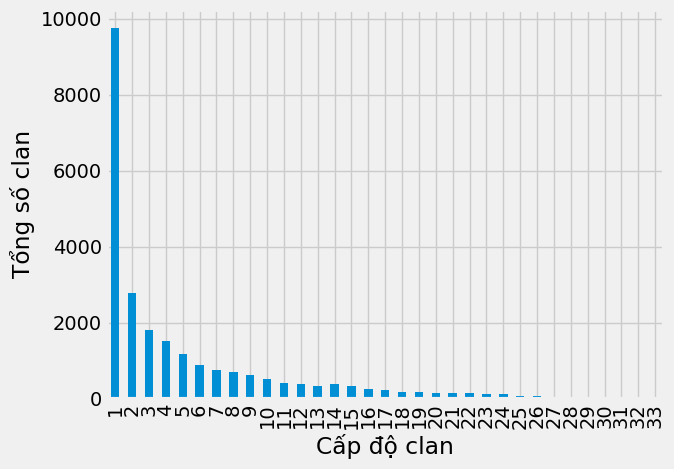

In [14]:
vietnam_clan_level.value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Cấp độ clan')
plt.ylabel('Tổng số clan')

Text(0.5, 1.0, 'Khoảng cấp độ của clan')

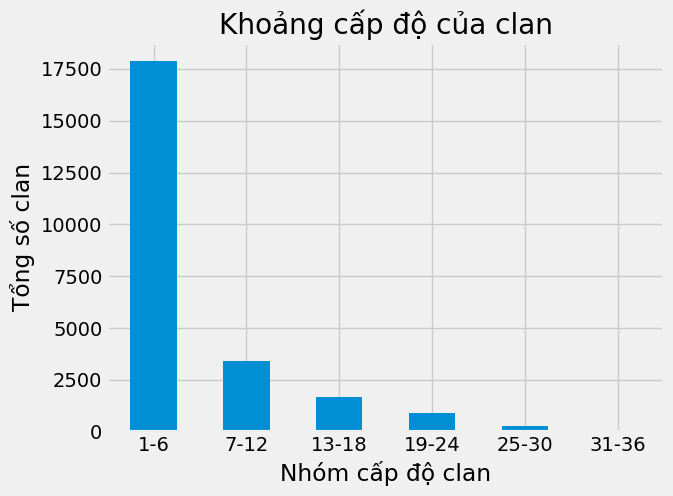

In [15]:
bins = [0, 6, 12, 18, 24, 30, 36]  # Nhóm lại levels 1-6, 7-12, 13-18,...

vietnam_clan_level_grouped = pd.cut(vietnam_clan_level, bins=bins, labels=['1-6', '7-12', '13-18', '19-24', '25-30', '31-36'])
vietnam_clan_level_grouped.value_counts().plot(kind = 'bar')
plt.xlabel('Nhóm cấp độ clan')
plt.ylabel('Tổng số clan')
plt.xticks(rotation=0)
plt.title('Khoảng cấp độ của clan')

## Số lượng thành viên trong clan

In [16]:
vietnam_num_members = df[df['clan_location'] == 'Vietnam']['num_members']
vietnam_num_members.value_counts()

num_members
1     5477
2     3352
3     2306
4     1634
5     1421
6     1148
7      974
8      713
9      626
10     471
11     384
12     317
13     272
14     260
15     247
46     233
48     233
16     212
17     201
50     199
49     197
47     190
18     179
19     148
21     141
20     139
24     131
22     126
23     124
45     122
26     116
44     111
25     110
29     107
27     106
43     105
32     102
30      97
28      96
38      96
40      93
42      93
36      88
35      86
31      86
37      85
33      83
41      83
34      79
39      72
0       43
Name: count, dtype: int64

Text(0, 0.5, 'Số clan')

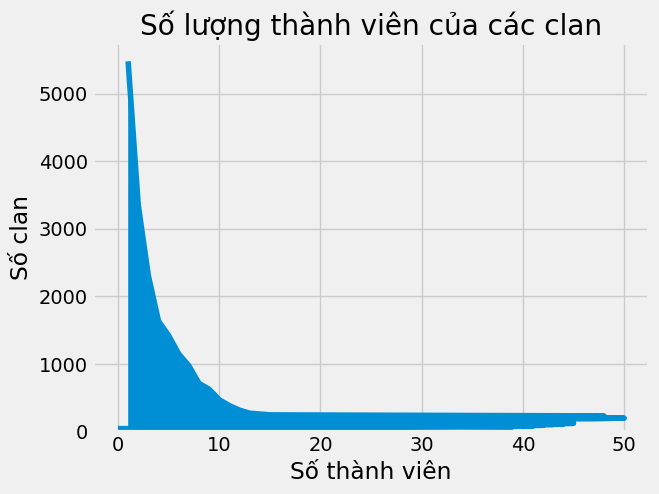

In [17]:
vietnam_num_members.value_counts().plot(kind = 'area')
plt.title('Số lượng thành viên của các clan')
plt.xlabel('Số thành viên')
plt.ylabel('Số clan')

In [18]:
vietnam_clan_war_league = df[df['clan_location'] == 'Vietnam']['clan_war_league']
vietnam_clan_war_league.value_counts()

clan_war_league
Unranked               16448
Gold League III          850
Silver League I          773
Gold League II           761
Gold League I            743
Silver League II         693
Crystal League III       630
Silver League III        605
Crystal League I         585
Crystal League II        563
Master League III        438
Master League II         274
Bronze League I          263
Master League I          196
Champion League III       92
Bronze League II          87
Bronze League III         42
Champion League II        42
Champion League I         29
Name: count, dtype: int64

In [19]:
gold = 0
unranked = 0
crystal = 0
silver = 0
bronze = 0
champion = 0
master = 0
for i in vietnam_clan_war_league:
    if 'Gold' in i:
        gold += 1
    if 'Unranked' in i:
        unranked += 1
    if 'Crystal' in i:
        crystal+= 1
    if 'Silver' in i:
        silver += 1
    if 'Bronze' in i:
        bronze += 1
    if 'Champion' in i:
        champion+= 1
    if 'Master' in i:
        master+= 1
values = [bronze,silver,gold,crystal,master,champion,unranked]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Đồng'),
  Text(1, 0, 'Bạc'),
  Text(2, 0, 'Vàng'),
  Text(3, 0, 'Pha lê'),
  Text(4, 0, 'Cao thủ'),
  Text(5, 0, 'Quán\nquân'),
  Text(6, 0, 'Chưa có\nrank')])

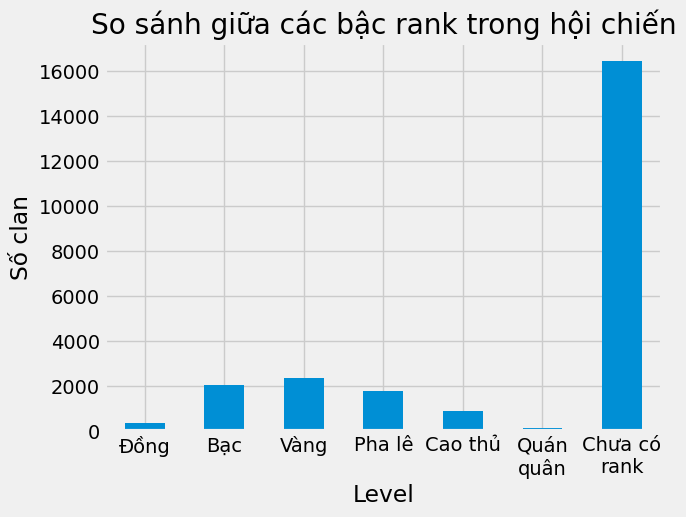

In [20]:
data_clan_war = {
    'Level': ['Đồng','Bạc','Vàng','Pha lê','Cao thủ','Quán\nquân','Chưa có\nrank'],
    'Count': values
}
data_clan_war = pd.DataFrame(data_clan_war)
data_clan_war.set_index('Level',inplace = True)
data_clan_war.plot(kind = 'bar',legend = None)
plt.title('So sánh giữa các bậc rank trong hội chiến')
plt.ylabel('Số clan')
plt.xticks(rotation=0)

## Các bậc clan trong kinh đô hội

In [21]:
vietnam_capital_league = df[(df['clan_location'] == 'Vietnam') & 
                            ('capital_league' != 'Unranked')]['capital_league']
vietnam_capital_league.value_counts()

capital_league
Unranked               20885
Gold League I            232
Gold League III          230
Gold League II           220
Crystal League III       220
Silver League I          219
Bronze League III        214
Bronze League II         214
Silver League III        200
Silver League II         186
Crystal League I         186
Crystal League II        184
Bronze League I          184
Master League III        167
Master League II         126
Champion League III      121
Master League I          106
Champion League II        82
Champion League I         53
Titan League III          43
Titan League II           21
Titan League I            13
Legend League              8
Name: count, dtype: int64

In [22]:
gold = 0
crystal = 0
silver = 0
bronze = 0
champion = 0
master = 0
titan = 0
legend = 0
for i in vietnam_capital_league:
    if 'Gold' in i:
        gold += 1
    if 'Crystal' in i:
        crystal+= 1
    if 'Silver' in i:
        silver += 1
    if 'Bronze' in i:
        bronze += 1
    if 'Champion' in i:
        champion+= 1
    if 'Master' in i:
        master+= 1
    if 'Titan' in i:
        titan+= 1
    if 'Legend' in i:
        legend+= 1 
values = [bronze,silver,gold,crystal,master,champion,titan,legend]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Đồng'),
  Text(1, 0, 'Bạc'),
  Text(2, 0, 'Vàng'),
  Text(3, 0, 'Pha\nlê'),
  Text(4, 0, 'Cao\nthủ'),
  Text(5, 0, 'Quán\nquân'),
  Text(6, 0, 'Titan'),
  Text(7, 0, 'Huyền\nthoại')])

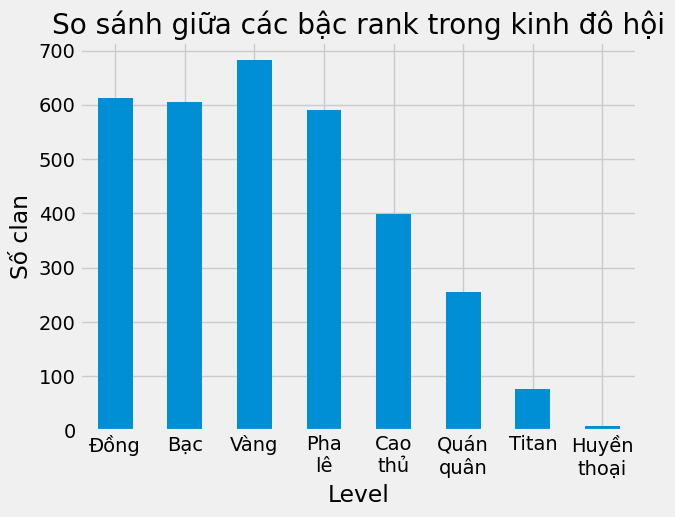

In [23]:
data_capital = {
    'Level': ['Đồng','Bạc','Vàng','Pha\nlê','Cao\nthủ',
              'Quán\nquân','Titan','Huyền\nthoại',],
    'Count': values
}
data_capital = pd.DataFrame(data_capital)
data_capital.set_index('Level',inplace = True)
data_capital.plot(kind = 'bar',legend = None)
plt.title('So sánh giữa các bậc rank trong kinh đô hội')
plt.ylabel('Số clan')
plt.xticks(rotation=0)